<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/graphic_rAI_mermaid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! npm install -g @mermaid-js/mermaid-cli@latest

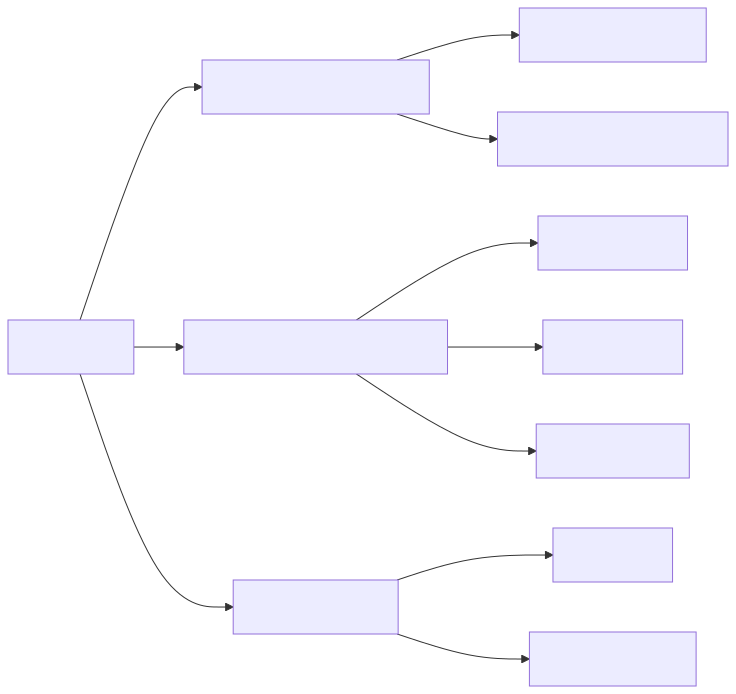

In [5]:
import subprocess
import json
import tempfile

from IPython.display import SVG, display, HTML, FileLink


# Your Mermaid diagram definition
diagram_definition = """
graph LR
    A[AI_Agent] --> B[CustomerSupportAgent]
    A[AI_Agent] --> C[ResourceManagementAgent]
    A[AI_Agent] --> D[LLM_Assistant]
    B[CustomerSupportAgent] --> E[Passengers Table]
    B[CustomerSupportAgent] --> F[Seat Assignments Table]
    C[ResourceManagementAgent] --> G[Flights Table]
    C[ResourceManagementAgent] --> H[Crew Table]
    C[ResourceManagementAgent] --> I[Aircraft Table]
    D[LLM_Assistant] --> J[Prompts]
    D[LLM_Assistant] --> K[Real-time Data]
"""

try:
    # Create a temporary file for the Puppeteer config
    with tempfile.NamedTemporaryFile(mode='w', delete=False) as config_file:
        json.dump({"args": ["--no-sandbox"]}, config_file)
        config_file_path = config_file.name

    # Execute mmdc with diagram definition passed as input
    # The input should be a string when text=True
    result = subprocess.run(['mmdc', '-i', '-', '-o', 'output.svg', '--puppeteerConfigFile', config_file_path],
                           input=diagram_definition, capture_output=True, text=True, check=True)

    # Display SVG if successful
    display(SVG('output.svg'))

except subprocess.CalledProcessError as e:
    print(f"Error executing mmdc: {e}")
    print(f"Standard output: {e.stdout}")
    print(f"Standard error: {e.stderr}")
    print("Please ensure 'mmdc' is installed and accessible in your environment.")
    print("You can install it using: !npm install -g @mermaid-js/mermaid-cli")
    print("If it's installed, ensure its directory is in your system's PATH.")
    print("If running as root, consider using the --no-sandbox flag (use with caution).")